In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
DF = pd.read_csv('healthcare-DFset-stroke-DF.csv')
DF.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
6,53882,Male,74.00,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,10434,Female,69.00,0,0,No,Private,Urban,94.39,22.80,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.00,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1


In [7]:
DF.shape

(5110, 12)

In [10]:
DF.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
DF.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


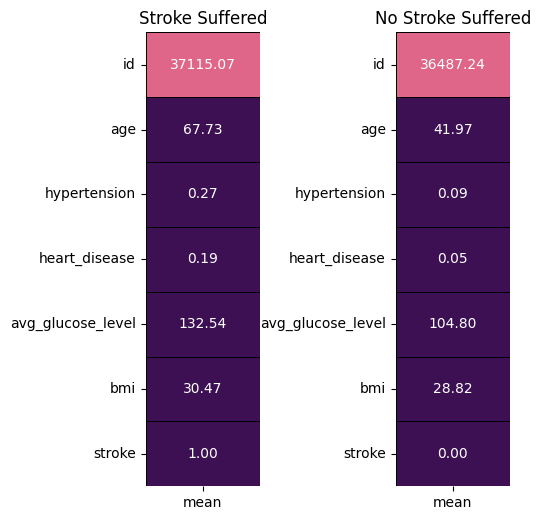

In [14]:
stroke = DF[DF['stroke'] == 1].describe().T
no_stroke = DF[DF['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)


* Mean values of all the features for cases of stroke suffered and no stroke suffered.

* age and avg_glucose_level can be solid 1st hand indicators to identify a stroke.
* Mean age values of patients that suffered a stroke, 67.73,is much higher than those did not suffer a stroke, 41.97.
* Similarly, avg_glucose_level value of 132.54 can indicate a higher chance of suffering from stroke than the avg_glucose_level value of 104.80 that has been found in patients that did not suffer a stroke

In [16]:
DF.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
DF['bmi'].fillna(DF['bmi'].mean(), inplace=True)


C:\Users\hal3r\AppData\Local\Temp\ipykernel_23668\3457363685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF['bmi'].fillna(DF['bmi'].mean(), inplace=True)


In [19]:
DF.drop(columns = ['id'],inplace = True)
col = list(DF.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(DF[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

DF['age'] = DF['age'].astype(int)
df1 = DF.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


* We drop the id column as it is just a unique identifier.

* Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a discrete feature.

In [21]:
from sklearn.preprocessing import LabelEncoder

text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

encoders = {}

print("Label Encoder Transformation:")
for col in text_data_features:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    encoders[col] = le  # store to inverse if needed later
    print(f"{col} : {dict(zip(le.classes_, le.transform(le.classes_)))}")


Label Encoder Transformation:
gender : {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}
ever_married : {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
work_type : {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}
Residence_type : {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
smoking_status : {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}


* gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
* ever_married  :  [1 0]  =  ['Yes' 'No']
* work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
* Residence_type  :  [1 0]  =  ['Urban' 'Rural']
* smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

In [24]:
tf1 = {}

# From encoders
for col, le in encoders.items():
    tf1[col] = dict(zip(le.transform(le.classes_), le.classes_))

tf1['hypertension'] = {0: 'No Hypertension', 1: 'Hypertension'}
tf1['heart_disease'] = {0: 'No Heart Disease', 1: 'Heart Disease'}

tf1


{'gender': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2)},
 'ever_married': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'work_type': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4)},
 'Residence_type': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'smoking_status': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

C:\Users\hal3r\AppData\Local\Temp\ipykernel_23668\782565651.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[discrete_features[i]],color = colors[0])
C:\Users\hal3r\AppData\Local\Temp\ipykernel_23668\782565651.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[discrete_features[i]],c

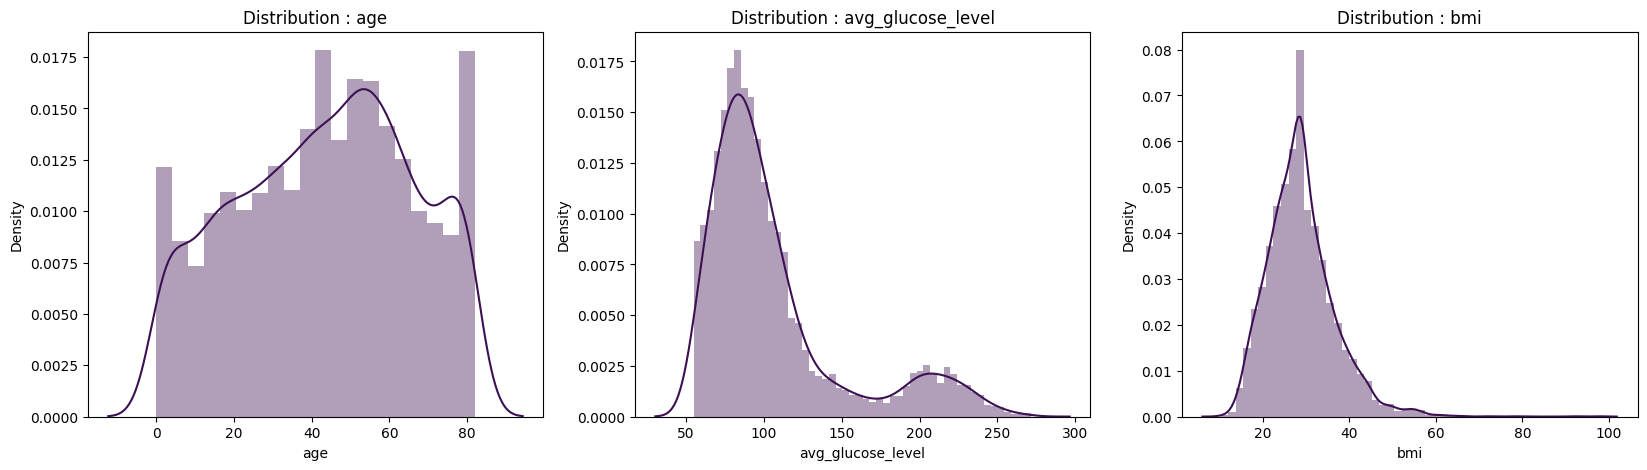

In [29]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

* Data distribution for age has dominant values around : 10, 60 & 80.
* avg_glucose_level has 2 peaks of uneven heights present at values around : 100 & 200.
* bmi has a near about normal distribution but it has values in low numbers towards the right side!

### Feature Engineering

The dataset is Unbalanced with a bias towards No Stroke in a ratio of 19 : 1 for No Stroke : Stroke. We will first balance the dataset using SMOTE Analysis!